Naman Raiyani

60009220057

D2-1

IPCV Exp 8

In [55]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft2, ifft2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
def load_image(image_path, grayscale=True):
    if grayscale:
        return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        return cv2.imread(image_path)

In [57]:
def compute_fourier_transform(image):
    num_rows, num_cols = image.shape
    x_coords, y_coords = np.meshgrid(np.arange(num_cols), np.arange(num_rows))
    transformed_image = image * (-1) ** (x_coords + y_coords)
    return fft2(transformed_image)

In [58]:
def display_two_images(image1, image2, title1='Image 1', title2='Image 2'):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(image1, cmap='gray' if len(image1.shape) == 2 else None)
    plt.title(title1)
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(image2, cmap='gray' if len(image2.shape) == 2 else None)
    plt.title(title2)
    plt.axis('off')

    plt.show()

In [61]:
image_path1 = '/content/drive/MyDrive/Colab Notebooks/IPCV/2.jpg'
grayscale_image = load_image(image_path1, grayscale=True)

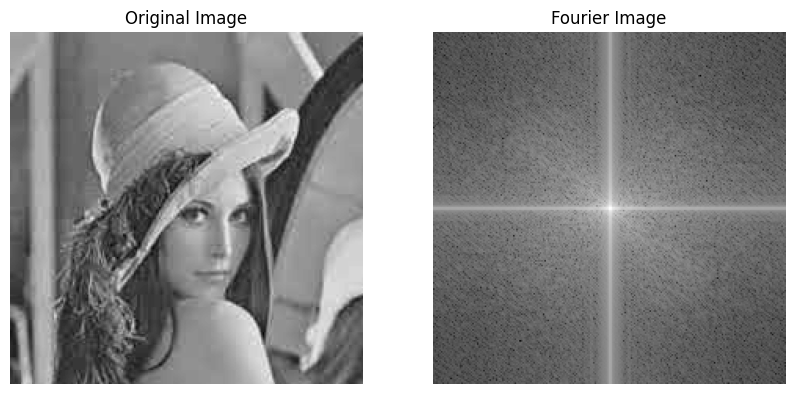

In [64]:
fourier_image = compute_fourier_transform(grayscale_image)
display_two_images(grayscale_image, 20*np.log(1 + abs(fourier_image)), 'Original Image', 'Fourier Image')

In [79]:
def display_three_images(image1, image2, image3, title1='Image 1', title2='Image 2', title3='Image 3'):
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(image1, cmap='gray' if len(image1.shape) == 2 else None)
    plt.title(title1)
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(image2, cmap='gray' if len(image2.shape) == 2 else None)
    plt.title(title2)
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(image3, cmap='gray' if len(image3.shape) == 2 else None)
    plt.title(title3)
    plt.axis('off')

    plt.show()

In [80]:
def low_pass_filter(fourier_transform, cutoff):
    num_rows, num_cols = fourier_transform.shape
    u_coords, v_coords = np.meshgrid(np.arange(num_cols) - num_cols // 2, np.arange(num_rows) - num_rows // 2)
    distance_from_origin = np.sqrt(u_coords**2 + v_coords**2)
    low_pass_mask = (distance_from_origin <= cutoff)

    filtered_image = fourier_transform * low_pass_mask
    return ifft2(filtered_image).real * (-1) ** (np.arange(num_rows)[:, None] + np.arange(num_cols)), low_pass_mask

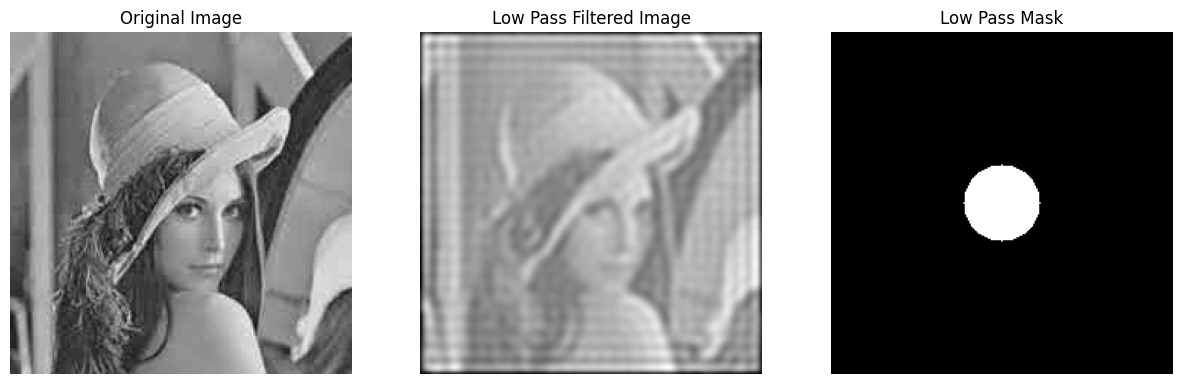

In [81]:
cutoff_freq = 25
filtered_image, lp_mask = low_pass_filter(fourier_image, cutoff_freq)
display_three_images(grayscale_image, filtered_image, lp_mask, 'Original Image', 'Low Pass Filtered Image', 'Low Pass Mask')

In [82]:
def high_pass_filter(fourier_transform, cutoff):
    num_rows, num_cols = fourier_transform.shape
    u_coords, v_coords = np.meshgrid(np.arange(num_cols) - num_cols // 2, np.arange(num_rows) - num_rows // 2)
    distance_from_origin = np.sqrt(u_coords**2 + v_coords**2)

    high_pass_mask = (distance_from_origin > cutoff)

    filtered_image = fourier_transform * high_pass_mask
    return ifft2(filtered_image).real * (-1) ** (np.arange(num_rows)[:, None] + np.arange(num_cols)), high_pass_mask

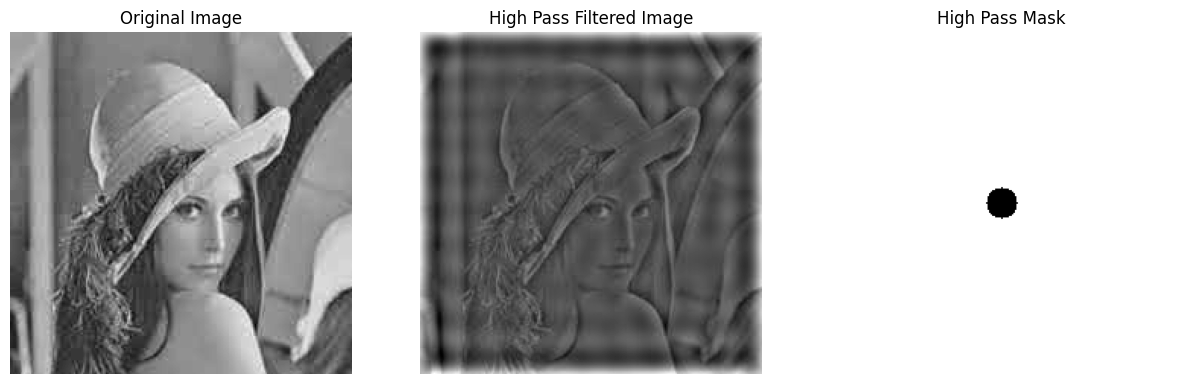

In [84]:
cutoff_freq = 10
filtered_image, hp_mask = high_pass_filter(fourier_image, cutoff_freq)
display_three_images(grayscale_image, filtered_image, hp_mask, 'Original Image', 'High Pass Filtered Image', 'High Pass Mask')

In [85]:
def gaussian_low_pass_filter(shape, cutoff):
    num_rows, num_cols = shape
    u_coords, v_coords = np.meshgrid(np.arange(num_cols) - num_cols // 2, np.arange(num_rows) - num_rows // 2)
    distance_from_origin = np.sqrt(u_coords**2 + v_coords**2)
    return np.exp(-(distance_from_origin**2) / (2 * (cutoff**2)))

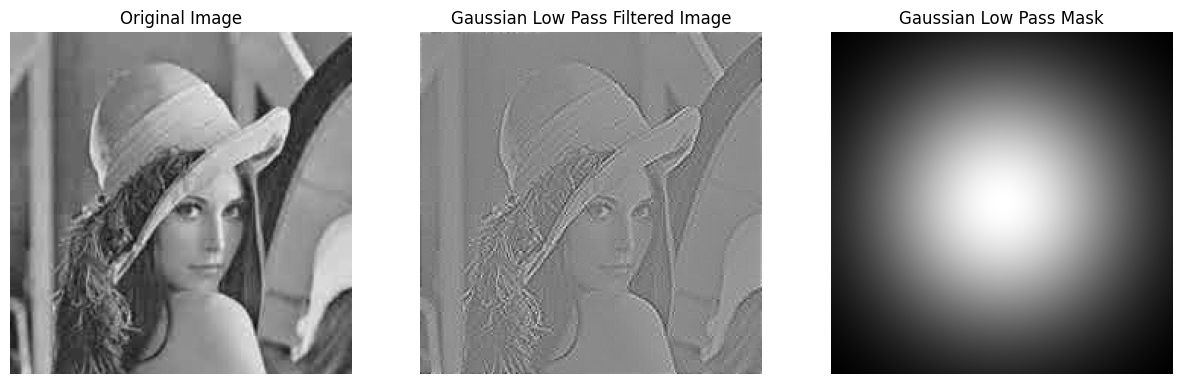

In [104]:
image_shape = grayscale_image.shape
gaussian_lp_mask = gaussian_low_pass_filter(image_shape, cutoff = 60)
filtered_lp_image = ifft2(fourier_image * gaussian_lp_mask).real
filtered_lp_image = filtered_lp_image * (-1) ** (image_shape[0] + image_shape[1])
display_three_images(
    grayscale_image,
    filtered_lp_image,
    gaussian_lp_mask,
    'Original Image',
    'Gaussian Low Pass Filtered Image',
    'Gaussian Low Pass Mask',
)

In [112]:
def gaussian_high_pass_filter(shape, cutoff):
    num_rows, num_cols = shape
    u_coords, v_coords = np.meshgrid(np.arange(num_cols) - num_cols // 2, np.arange(num_rows) - num_rows // 2)
    distance_from_origin = np.sqrt(u_coords**2 + v_coords**2)
    return 1 - np.exp(-(distance_from_origin**2) / (2 * (cutoff**2)))

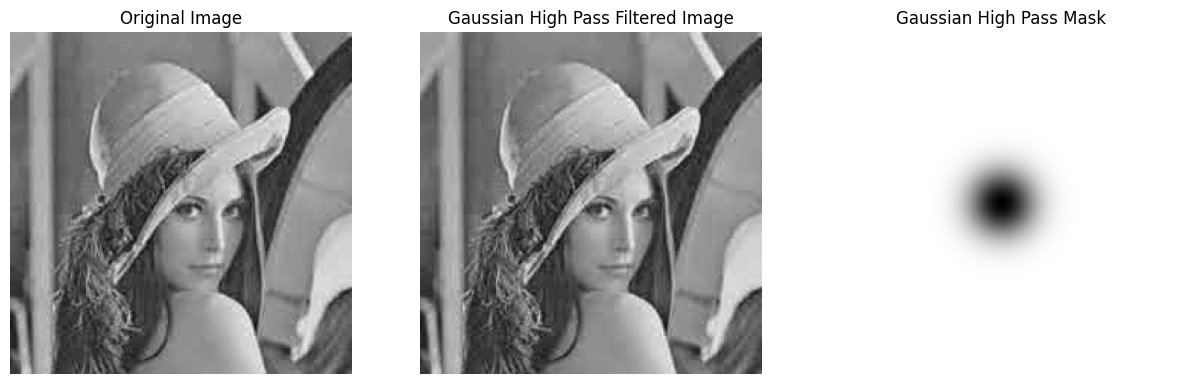

In [113]:
gaussian_hp_mask = gaussian_high_pass_filter(image_shape, cutoff = 15)
filtered_hp_image = ifft2(fourier_image * gaussian_hp_mask).real
filtered_hp_image = filtered_hp_image * (-1) ** (image_shape[0] + image_shape[1])
display_three_images(
    grayscale_image,
    filtered_hp_image,
    gaussian_hp_mask,
    'Original Image',
    'Gaussian High Pass Filtered Image',
    'Gaussian High Pass Mask',
)

In [117]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

random_index = np.random.randint(0, x_test.shape[0])
fashion_image = x_test[random_index]

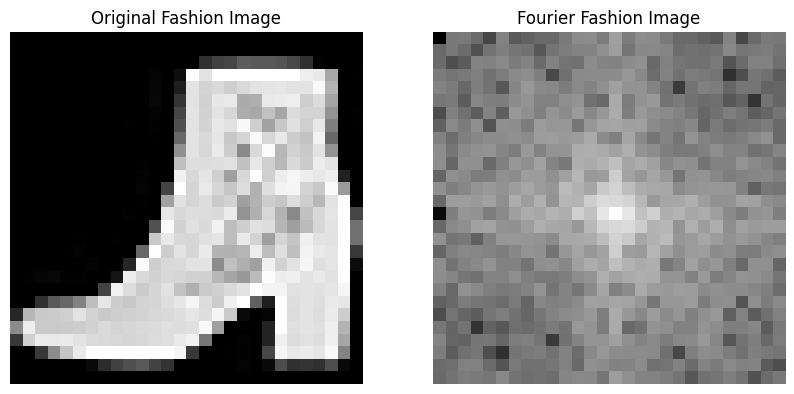

In [118]:
fashion_fourier_image = compute_fourier_transform(fashion_image)

display_two_images(fashion_image, 20 * np.log(1 + abs(fashion_fourier_image)),
                   'Original Fashion Image', 'Fourier Fashion Image')

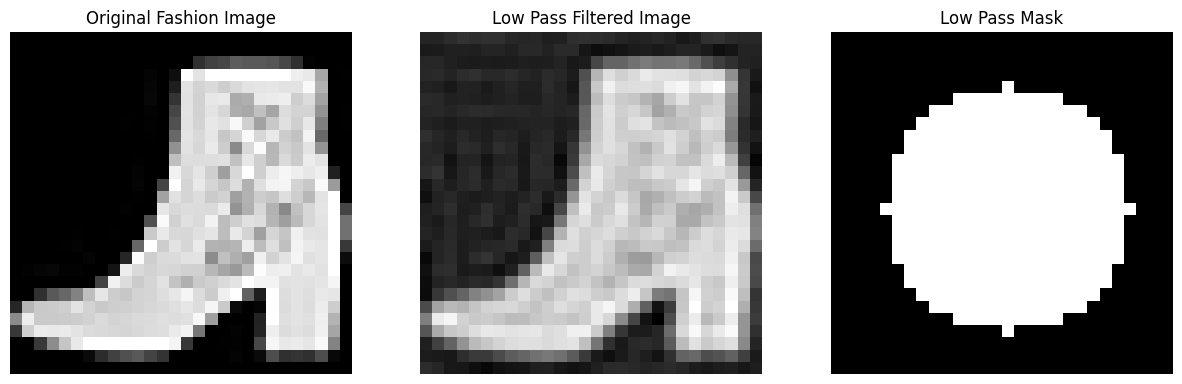

In [121]:
cutoff_freq_lp = 10
filtered_fashion_image_lp, lp_mask_fashion = low_pass_filter(fashion_fourier_image, cutoff_freq_lp)

display_three_images(fashion_image, filtered_fashion_image_lp, lp_mask_fashion,
                     'Original Fashion Image', 'Low Pass Filtered Image', 'Low Pass Mask')

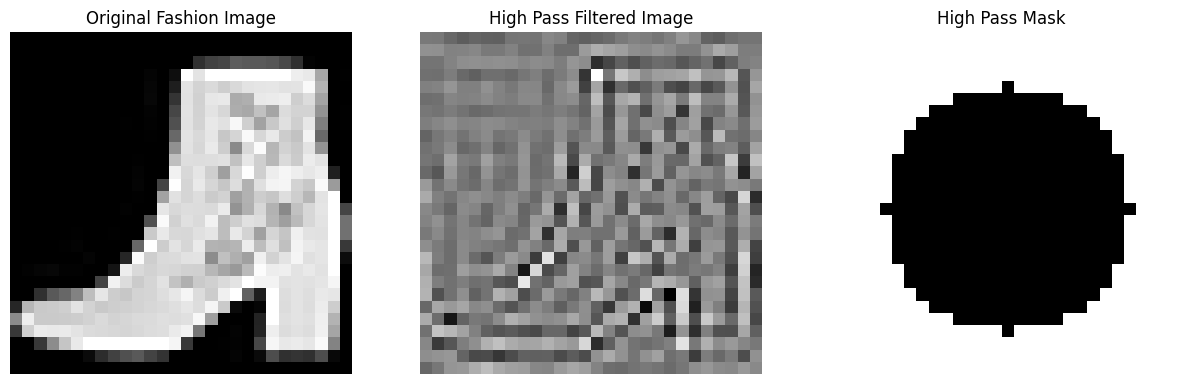

In [122]:
cutoff_freq_hp = 10
filtered_fashion_image_hp, hp_mask_fashion = high_pass_filter(fashion_fourier_image, cutoff_freq_hp)

display_three_images(fashion_image, filtered_fashion_image_hp, hp_mask_fashion,
                     'Original Fashion Image', 'High Pass Filtered Image', 'High Pass Mask')

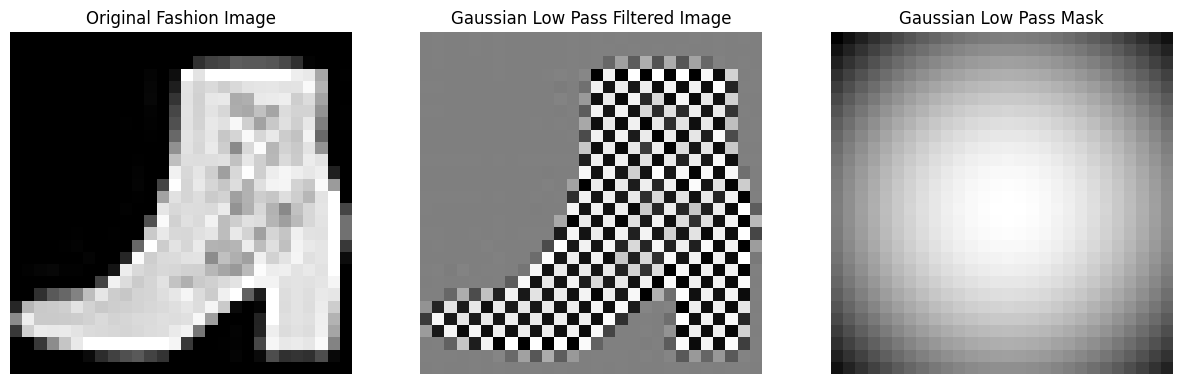

In [123]:
gaussian_lp_mask_fashion = gaussian_low_pass_filter(fashion_image.shape, cutoff=60)
filtered_fashion_image_lp_gaussian = ifft2(fashion_fourier_image * gaussian_lp_mask_fashion).real
filtered_fashion_image_lp_gaussian *= (-1) ** (fashion_image.shape[0] + fashion_image.shape[1])

display_three_images(fashion_image, filtered_fashion_image_lp_gaussian, gaussian_lp_mask_fashion,
                     'Original Fashion Image', 'Gaussian Low Pass Filtered Image', 'Gaussian Low Pass Mask')

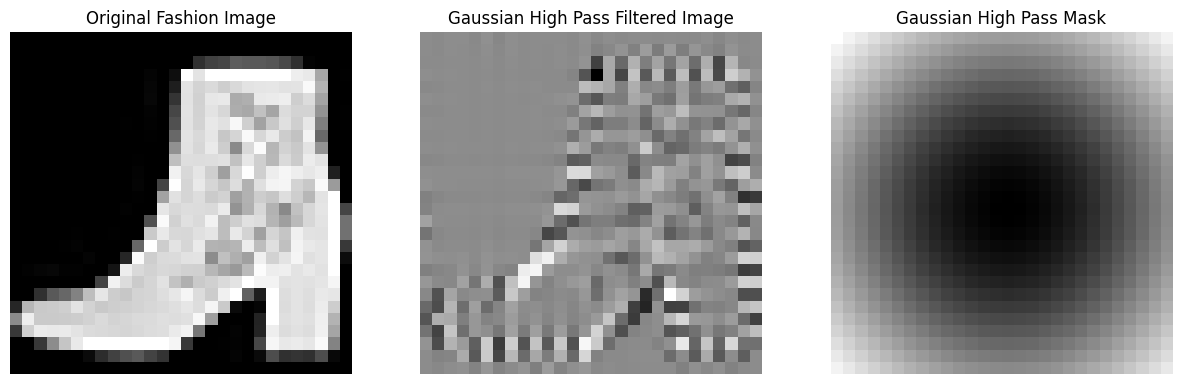

In [124]:
gaussian_hp_mask_fashion = gaussian_high_pass_filter(fashion_image.shape, cutoff=15)
filtered_fashion_image_hp_gaussian = ifft2(fashion_fourier_image * gaussian_hp_mask_fashion).real
filtered_fashion_image_hp_gaussian *= (-1) ** (fashion_image.shape[0] + fashion_image.shape[1])

display_three_images(fashion_image, filtered_fashion_image_hp_gaussian, gaussian_hp_mask_fashion,
                     'Original Fashion Image', 'Gaussian High Pass Filtered Image', 'Gaussian High Pass Mask')

#Observations :

1. **Fourier Transform:** Converted the image from the spatial domain to the frequency domain, revealing frequency components of each color channel.

2. **Low-Pass Filter:** Retained low frequencies to smooth the image and reduce noise; varying the cutoff frequency affects the level of smoothing.

3. **High-Pass Filter:** Preserved high frequencies to enhance edges and details; changing the cutoff frequency alters the sharpness of the image.

4. **Gaussian Filters:** Applied Gaussian low-pass and high-pass filters for smoother transitions compared to ideal filters, impacting the overall image quality.

5. **Cutoff Frequency Effects:** Higher cutoff frequencies in low-pass filters reduce blurriness, while in high-pass filters, they retain finer details at the cost of losing image structure.

6. **Overall Observation:** Adjusting filtering parameters enables targeted enhancements or reductions in image quality, allowing for greater control in image processing.

#Applications :

Image Compression: Fourier transforms help reduce image file sizes by transforming the image to the frequency domain, where less important frequency components can be discarded.

Image Restoration: Techniques like deblurring and denoising use Fourier transforms to identify and reduce noise or artifacts in images, improving visual quality.

Feature Extraction: Fourier transforms can highlight important features in images, such as edges and textures, which are useful in computer vision tasks and object recognition.

Pattern Recognition: Fourier analysis is employed in applications like facial recognition and biometric identification, where specific frequency patterns are crucial.

Medical Imaging: In MRI and CT scans, Fourier transforms reconstruct images from raw data, allowing for detailed internal body imaging.

Video Processing: Fourier transforms assist in video compression and motion detection, enhancing video quality and reducing bandwidth requirements.

Remote Sensing: Used in satellite imagery analysis, Fourier transforms help detect changes in land use, vegetation patterns, and other features over time.

#Conclusion :
 Fourier transforms and filtering techniques are fundamental tools in image processing, enabling a wide range of applications from compression and restoration to feature extraction and medical imaging. By manipulating frequency components, these methods enhance image quality and facilitate advanced analyses, making them essential for modern computer vision and digital imaging technologies. Their versatility continues to drive innovation across various fields.